In [2]:
#Project 9

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

ramenFile = 'ramen-ratings.csv'
lifeFile = 'life_expectancy_years.csv'
ramen = pd.read_csv(ramenFile)
life = pd.read_csv(lifeFile)
happyFile = 'world-happiness-report-2019.csv'
happy = pd.read_csv(happyFile)


#Remove the unrated ramen from dataset
ramen = ramen[ramen.Stars != 'Unrated']


#Print only the first 20 in the table
ramen.head(10)


,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
5,2575,Samyang Foods,Kimchi song Song Ramen,Pack,South Korea,4.75,NaN
6,2574,Acecook,Spice Deli Tantan Men With Cilantro,Cup,Japan,4,NaN
7,2573,Ikeda Shoku,Nabeyaki Kitsune Udon,Tray,Japan,3.75,NaN
8,2572,Ripe'n'Dry,Hokkaido Soy Sauce Ramen,Pack,Japan,0.25,NaN
9,2571,KOKA,The Original Spicy Stir-Fried Noodles,Pack,Singapore,2.5,NaN


In [44]:
#Print only the first 20 in the table for life span
life.head(20)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,55.7,56.2,56.7,57.2,57.7,57.8,57.9,58.0,58.4,58.7
1,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,75.9,76.3,76.7,77.0,77.2,77.4,77.6,77.7,77.9,78.0
2,Algeria,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,...,76.3,76.5,76.7,76.8,77.0,77.1,77.3,77.4,77.6,77.9
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82.7,82.7,82.6,82.6,82.6,82.6,82.5,82.5,NaN,NaN
4,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,59.3,60.1,60.9,61.7,62.5,63.3,64.0,64.7,64.9,65.2
5,Antigua and Barbuda,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,...,76.9,76.8,76.9,77.0,77.3,77.1,77.2,77.3,77.4,77.6
6,Argentina,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,...,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.7,76.8,77.0
7,Armenia,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,...,73.0,73.3,73.8,74.3,75.0,75.4,75.4,75.7,75.8,76.0
8,Australia,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,...,81.8,82.0,82.2,82.3,82.5,82.6,82.6,82.5,82.7,82.9
9,Austria,34.4,34.4,34.4,34.4,34.4,34.4,34.4,34.4,34.4,...,80.3,80.5,80.7,80.9,81.1,81.3,81.4,81.5,81.7,81.8


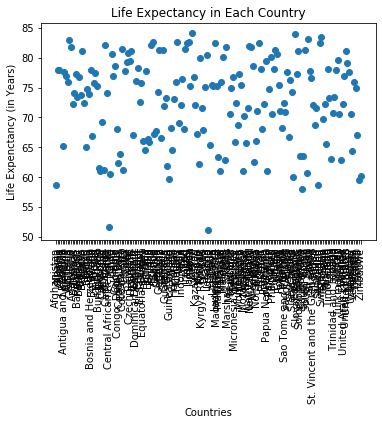

<Figure size 64000x64000 with 0 Axes>

In [85]:
#2018 Life spans
countries = life.iloc[:, 0]
lifee = life.iloc[:, 219]

#The countries = lifeee
#print(countries)

#2018 life spans = lifee
#print(lifee)

#Graph Life Expectancy for each Country

plt.scatter(countries, lifee)
plt.xticks(rotation=90)

#plt.xticks(np.arange(0, 186, 10.0))
#plt.xticks(countries)
#plt.tick_params(axis='x', which='major', labelsize=5)
plt.xlabel('Countries')
plt.ylabel('Life Expenctancy (in Years)')
plt.title('Life Expectancy in Each Country')
plt.figure(figsize=(800,800))
plt.show()


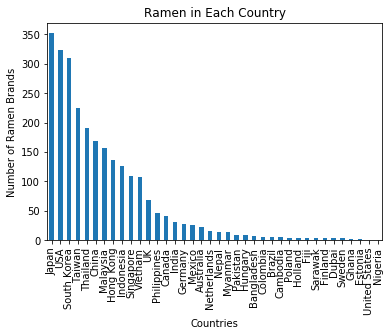

In [6]:
#Countries
ramencountries = ramen.iloc[:, 4]

#USE BAR CHART

plt.xlabel('Countries')
plt.ylabel('Number of Ramen Brands')
plt.title('Ramen in Each Country')
ramen['Country'].value_counts().plot.bar()
plt.show()

In [9]:
# #Compare Japan ramen ratings vs US ratings

# if (ramen['Country'] == 'Japan'):
#     print("hi")




In [20]:
happy.head(10)


,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0
5,Switzerland,6,11,44.0,21.0,13.0,11.0,7.0,16.0,8.0,4.0
6,Sweden,7,18,34.0,8.0,25.0,10.0,6.0,17.0,13.0,17.0
7,New Zealand,8,15,22.0,12.0,5.0,8.0,5.0,8.0,26.0,14.0
8,Canada,9,23,18.0,49.0,20.0,9.0,11.0,14.0,19.0,8.0
9,Austria,10,10,64.0,24.0,31.0,26.0,19.0,25.0,16.0,15.0


In [37]:
#Ramen Ratings Per Country Scatter Plot

#ramen['Country'].unique()

# x = range(38)
# y = range(5)
# fig = plt.figure()
# ax1 = fig.add_subplot(111)

# ax1.scatter(ramen['Country'].unique(), ramen['Stars'].max(), marker="s")
# # plt.scatter(ramen['Country'].unique(), ramen['Stars'], marker="o")
# plt.legent(loc='upper left')
# plt.show()

ramen['Country'].unique() #38 countries

array(['Japan', 'Taiwan', 'USA', 'India', 'South Korea', 'Singapore',
       'Thailand', 'Hong Kong', 'Vietnam', 'Ghana', 'Malaysia',
       'Indonesia', 'China', 'Nigeria', 'Germany', 'Hungary', 'Mexico',
       'Fiji', 'Australia', 'Pakistan', 'Bangladesh', 'Canada', 'Nepal',
       'Brazil', 'UK', 'Myanmar', 'Netherlands', 'United States',
       'Cambodia', 'Finland', 'Sarawak', 'Philippines', 'Sweden',
       'Colombia', 'Estonia', 'Holland', 'Poland', 'Dubai'], dtype=object)

COOL QUERIES COULD DO \(^ - ^)/

- Number of Ramen Brands in Each Country
- Brands wtih the Highest Rating
- Highest Ramen Rating of Each Country and Life Expectancy
- Lowest Rating of Each Country and Life Expectancy
- Highest Ramen Rating and Happiness Level
- Happiness Level & Life Expectancy
- Compare Japan and USA for Ramen, Life, and Happy


## 